In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
%matplotlib inline

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ratio_df = pd.read_csv("/content/drive/MyDrive/EC439/ratio_df.csv")

In [ ]:
# Separate features (X) and target (Y)
X_ratio = ratio_df.drop(columns=['Fraud', 'Period End Date','Company name'])  # All columns except 'Fraud'
Y_ratio = ratio_df['Fraud']  # Only the 'Fraud' column

<ipython-input-6-65a34c571678>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Non-Fraud', 'Fraud']) # เปลี่ยนชื่อ 0 และ 1
<ipython-input-6-65a34c571678>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Non-Fraud', 'Fraud']) # เปลี่ยนชื่อ 0 และ 1
<ipython-input-6-65a34c571678>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Non-Fraud', 'Fraud']) # เปลี่ยนชื่อ 0 และ 1
<ipython-input-6-65a34c571678>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Non-Fraud', 'Fraud']) # เปลี่ยนชื่อ 0 และ 1
<ipython-input-6-65a34c571678>:14: UserWarning: set_ticklabels() should only be 

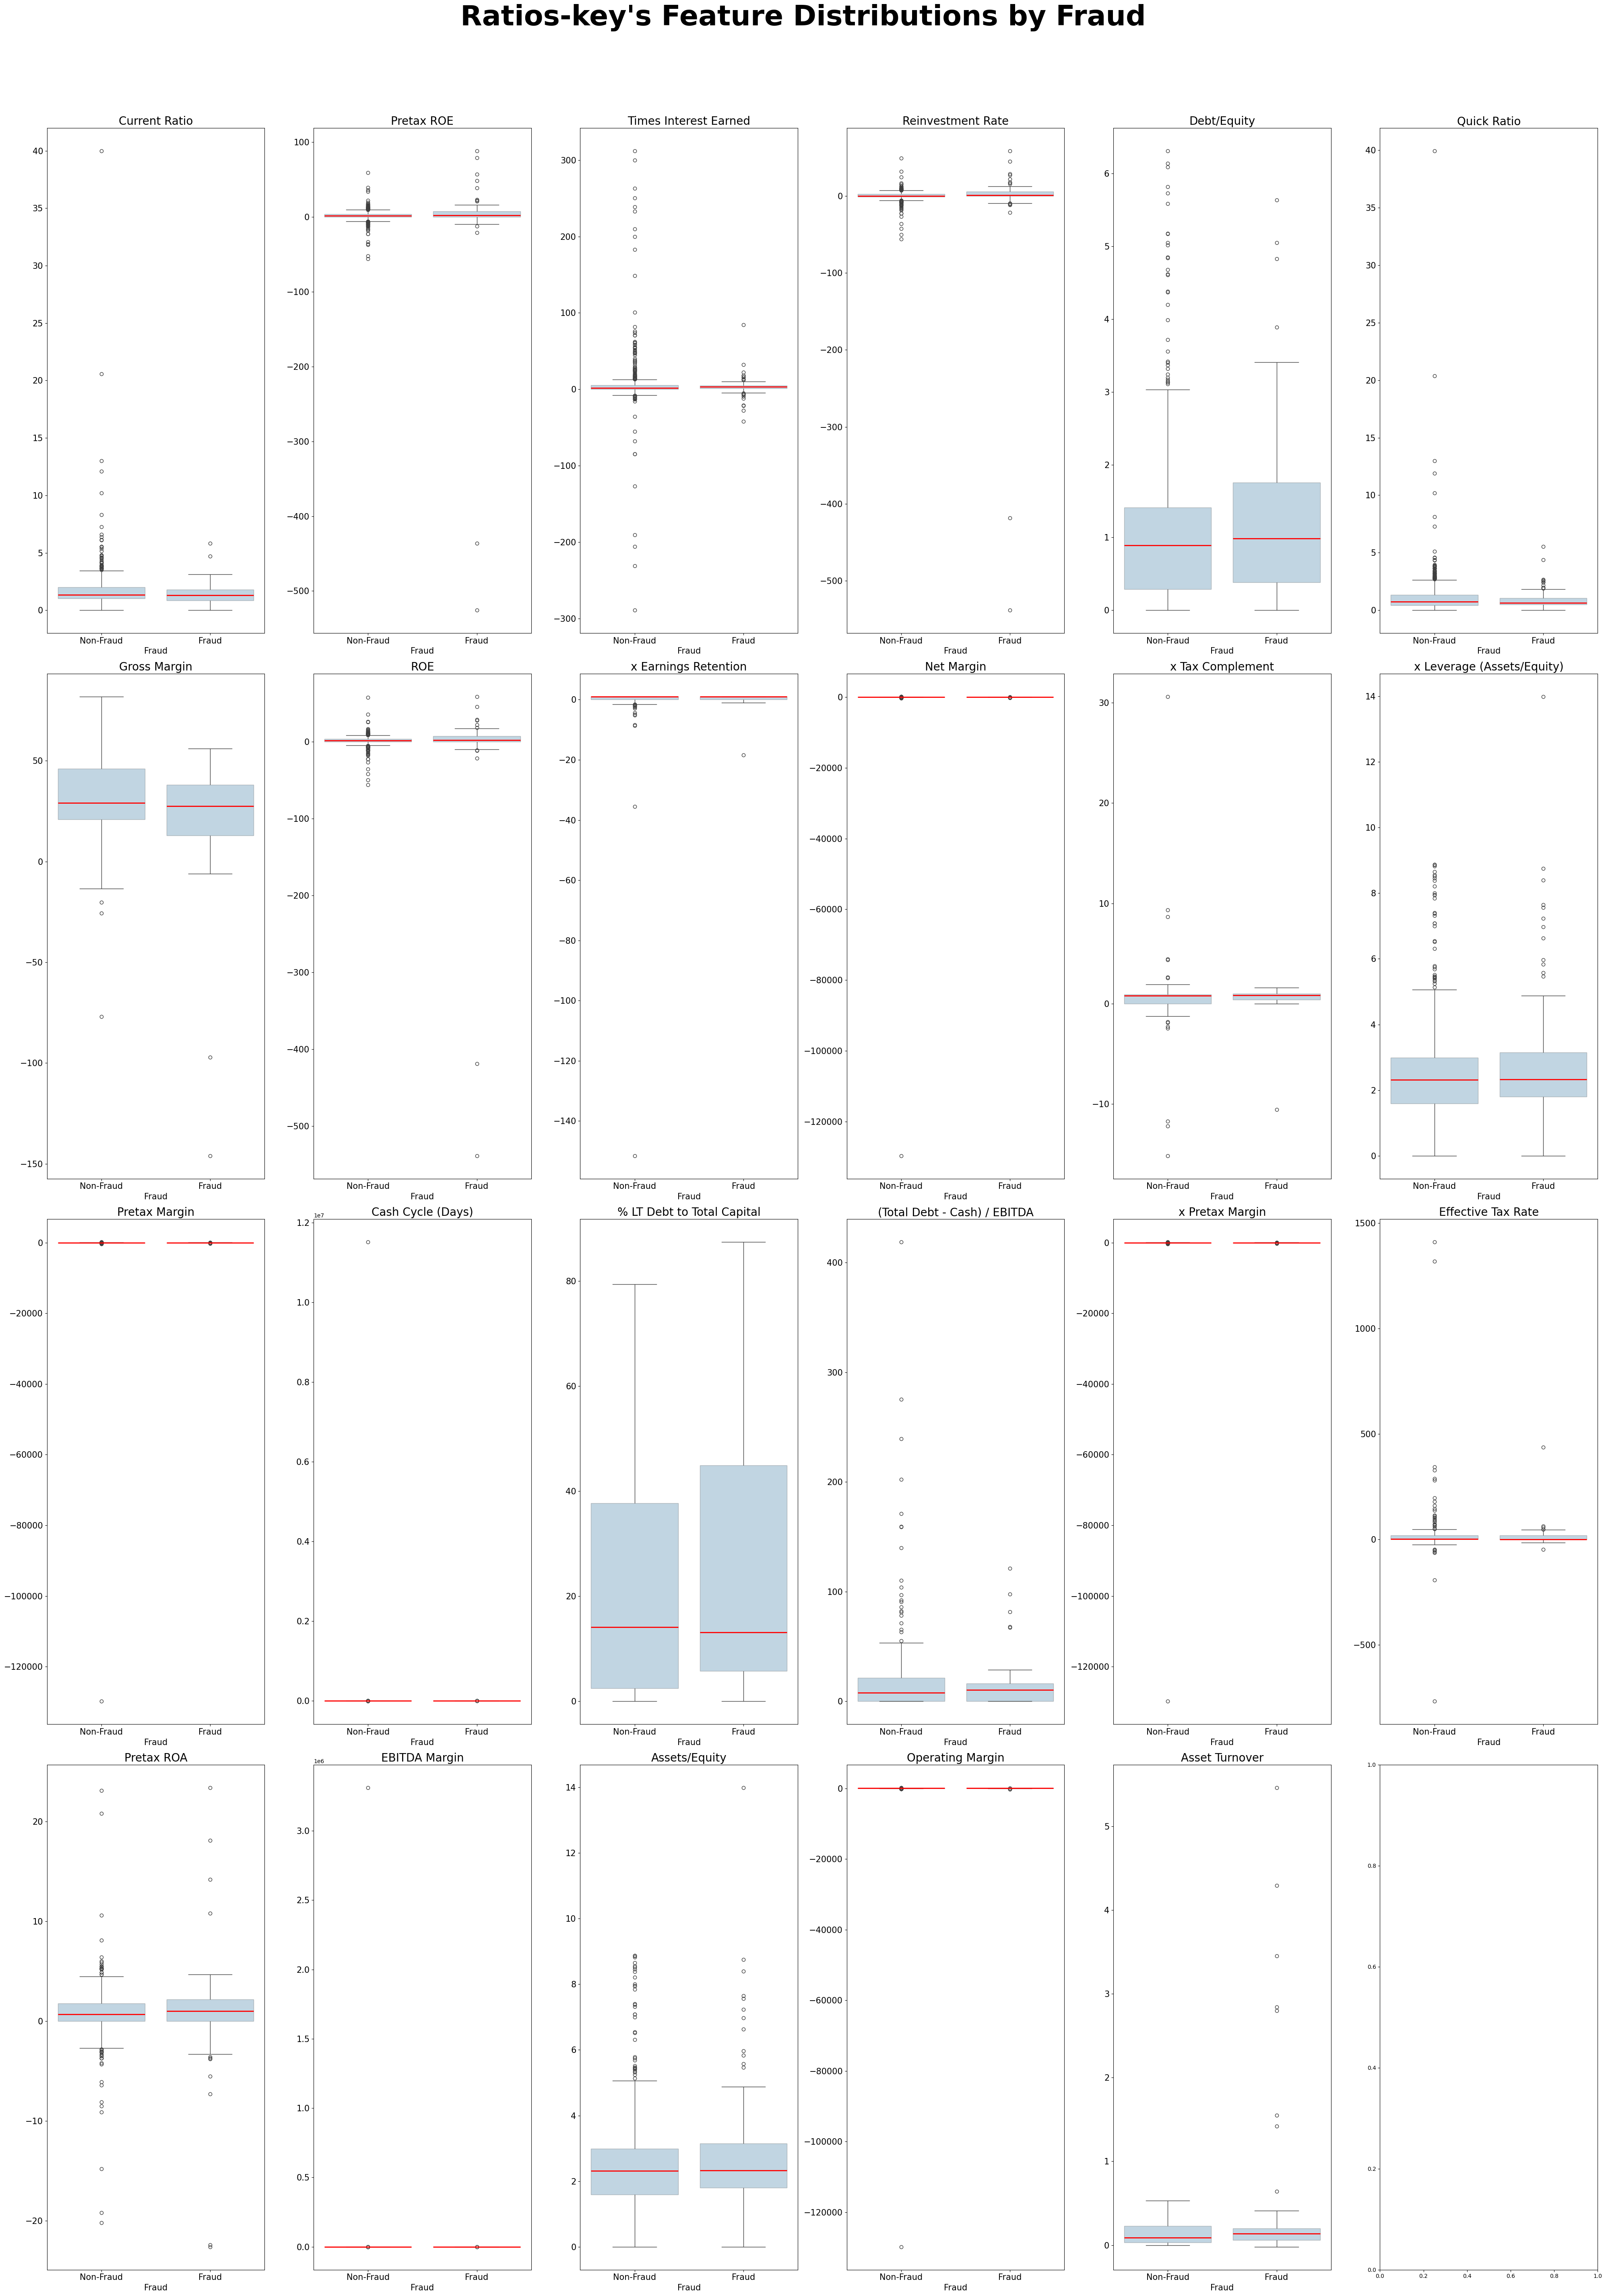

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

def BoxPlot(data, col, hue, ax):
    sns.boxplot(x=hue, y=col, data=data, ax=ax,
                boxprops=dict(alpha=0.3, linewidth=1),
                medianprops=dict(color="red", linewidth=2))
    ax.set_title(col, fontsize=20)
    ax.set_xlabel("Fraud", fontsize=15)
    ax.set_ylabel("")
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.set_xticklabels(['Non-Fraud', 'Fraud']) # เปลี่ยนชื่อ 0 และ 1

ratio_cols = X_ratio.columns

# Calculate grid dimensions for 42 plots
n_cols = 6  # Number of columns in the grid
n_rows = math.ceil(len(ratio_cols) / n_cols)  # Calculate number of rows

# Create subplots with adjusted grid size
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(40, 60))  # Adjust figsize
fig.suptitle("Ratios-key's Feature Distributions by Fraud", fontsize=50, weight='bold')

# Loop to create box plots for all 42 features
for i, col in enumerate(ratio_cols):
    row = i // n_cols
    col_num = i % n_cols
    BoxPlot(pd.concat([X_ratio, Y_ratio], axis=1), col, hue="Fraud", ax=axes[row, col_num])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.savefig('balance_sheet_feature_distributions_boxplot_all.png')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def normalize_by_group(df, group_col, cols_to_normalize):
    """
    Normalizes specified columns within groups of a DataFrame.

    Args:
        df: DataFrame to normalize.
        group_col: Column name to group by.
        cols_to_normalize: List of column names to normalize.

    Returns:
        DataFrame with normalized columns.
    """

    # Create a copy of the DataFrame to avoid modifying the original
    df_normalized = df.copy()

    # Group the DataFrame by the specified column
    for group, group_data in df_normalized.groupby(group_col):
        # Create a MinMaxScaler object
        scaler = MinMaxScaler()

        # Fit the scaler to the group data for the specified columns
        scaler.fit(group_data[cols_to_normalize])

        # Transform the group data and update the original DataFrame
        df_normalized.loc[group_data.index, cols_to_normalize] = scaler.transform(group_data[cols_to_normalize])

    return df_normalized

# Get columns to normalize (excluding 'Company name', 'Period End Date', 'Fraud')
cols_to_normalize = [col for col in ratio_df.columns if col not in ['Company name', 'Period End Date', 'Fraud']]

# Normalize ratio_df
ratio_df_normalized = normalize_by_group(ratio_df, 'Company name', cols_to_normalize)

# Display the normalized DataFrame
ratio_df_normalized.head()

,Period End Date,Current Ratio,Pretax ROE,Times Interest Earned,Reinvestment Rate,Debt/Equity,Quick Ratio,Gross Margin,ROE,x Earnings Retention,...,(Total Debt - Cash) / EBITDA,x Pretax Margin,Effective Tax Rate,Pretax ROA,EBITDA Margin,Assets/Equity,Operating Margin,Asset Turnover,Company name,Fraud
0,Jun-2004,0.000000,0.385819,0.252199,0.460699,0.000000,0.000000,0.875502,0.423695,1.0,...,0.0,0.518499,0.010569,0.453901,0.415693,0.000000,0.500260,0.0,AKR,0
1,Dec-2004,0.311189,0.385819,0.000000,0.460699,0.472973,0.371622,0.620482,0.423695,1.0,...,0.0,0.420375,0.010569,0.453901,0.000000,0.545035,0.409870,0.0,AKR,0
2,Mar-2005,0.000000,0.385819,0.134897,0.460699,0.000000,0.000000,0.253012,0.423695,1.0,...,0.0,0.478820,0.016266,0.453901,0.188648,0.000000,0.466494,0.0,AKR,0
3,Jun-2005,0.496503,0.385819,0.321114,0.460699,0.169884,0.533784,0.534137,0.423695,1.0,...,0.0,0.558177,0.010344,0.453901,0.430718,0.275982,0.540260,0.0,AKR,0
4,Sep-2005,0.000000,0.385819,0.260997,0.460699,0.000000,0.000000,0.514056,0.423695,1.0,...,0.0,0.548525,0.010569,0.453901,0.404007,0.000000,0.532468,0.0,AKR,0


In [ ]:
# Define features (X) and target (Y)
X_ratio = ratio_df_normalized.drop(columns=['Fraud','Period End Date','Company name'])  # Features: All columns except 'Fraud'
Y_ratio = ratio_df_normalized['Fraud']  # Target: 'Fraud' column

# Display the shapes of X and Y to confirm the split
print("Shape of X:", X_ratio.shape)
print("Shape of Y:", Y_ratio.shape)

Shape of X: (910, 23)
Shape of Y: (910,)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_ratio, Y_ratio, test_size=0.2, random_state=42)

# Display the shapes of the datasets to confirm the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (728, 23)
Shape of X_test: (182, 23)
Shape of Y_train: (728,)
Shape of Y_test: (182,)


In [ ]:
# 1. Create Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# 2. Train Logistic Regression model
logreg_model.fit(X_train, Y_train)

# 3. Create Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# 4. Train Random Forest model
rf_model.fit(X_train, Y_train)

# 5. Make predictions on the test set
logreg_predictions = logreg_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# 6. Evaluate model performance
def evaluate_model(predictions, Y_test):
    accuracy = accuracy_score(Y_test, predictions)
    precision = precision_score(Y_test, predictions)
    recall = recall_score(Y_test, predictions)
    f1 = f1_score(Y_test, predictions)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

print("Logistic Regression Performance:")
evaluate_model(logreg_predictions, Y_test)

print("\nRandom Forest Performance:")
evaluate_model(rf_predictions, Y_test)

Logistic Regression Performance:
Accuracy: 0.9615
Precision: 0.8696
Recall: 0.8333
F1 Score: 0.8511

Random Forest Performance:
Accuracy: 0.9945
Precision: 1.0000
Recall: 0.9583
F1 Score: 0.9787


In [ ]:
from sklearn.model_selection import GridSearchCV

# กำหนดพารามิเตอร์ที่ต้องการทดสอบ
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
}

# สร้าง GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1')

# เริ่มการค้นหา
grid_search.fit(X_train, Y_train)

# แสดงผลลัพธ์
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# ใช้โมเดลที่ดีที่สุด
best_rf_model = grid_search.best_estimator_

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Best score: 0.9518134836739488


In [ ]:
# Get feature coefficients from the Logistic Regression model
coefficients = logreg_model.coef_[0]

# Create a DataFrame to store feature coefficients along with their names
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient value in descending order
feature_importances_df['Absolute_Coefficient'] = abs(feature_importances_df['Coefficient'])
feature_importances_df = feature_importances_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Display the top N important features (e.g., top 10)
print(feature_importances_df.head(10))

                         Feature  Coefficient  Absolute_Coefficient
22                Asset Turnover    -4.459274              4.459274
7                            ROE     3.450617              3.450617
18                    Pretax ROA    -3.277324              3.277324
1                     Pretax ROE     3.058529              3.058529
2          Times Interest Earned     2.528962              2.528962
17            Effective Tax Rate     1.413983              1.413983
19                 EBITDA Margin     1.345598              1.345598
10              x Tax Complement     1.111463              1.111463
15  (Total Debt - Cash) / EBITDA     1.053402              1.053402
3              Reinvestment Rate    -0.879918              0.879918


Reasoning:

logreg_model.coef_: This attribute of the trained Logistic Regression model stores the coefficients for each feature. The magnitude of the coefficient indicates the feature's importance. Larger coefficients suggest stronger influence on the prediction. Since coef_ returns a 2D array (even for binary classification), we access the first row using [0] to get the coefficients for the positive class.
Creating a DataFrame: Similar to the Random Forest approach, we create a pandas DataFrame to organize and display the feature names along with their coefficients.
Sorting by Absolute Coefficient: We sort the DataFrame by the absolute values of the coefficients. This is because both positive and negative coefficients can be important, and we want to see the features with the largest impact, regardless of direction.
Displaying: We use head(10) to display the top 10 features with the largest absolute coefficients. You can adjust this number to see more or fewer features.

Sources
[Grade0/DDAM](https://github.com/Grade0/DDAM)

In [ ]:
# Get feature importances from the best Random Forest model
importances = best_rf_model.feature_importances_

# Create a DataFrame to store feature importances along with their names
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Display the top N important features (e.g., top 10)
print(feature_importances_df.head(10))

                  Feature  Importance
22         Asset Turnover    0.185177
7                     ROE    0.090631
2   Times Interest Earned    0.075904
1              Pretax ROE    0.074073
3       Reinvestment Rate    0.065689
17     Effective Tax Rate    0.060268
19          EBITDA Margin    0.059990
13      Cash Cycle (Days)    0.059965
10       x Tax Complement    0.046731
18             Pretax ROA    0.039083


Reasoning:

best_rf_model.feature_importances_: This attribute of the trained Random Forest model stores the importance of each feature. It's calculated based on how much each feature contributes to reducing impurity in the decision trees of the forest.
Creating a DataFrame: We create a pandas DataFrame to easily organize and display the feature names along with their importances.
Sorting: We sort the DataFrame in descending order of importance to see the most important features at the top.
Displaying: Finally, we use head(10) to display the top 10 most important features. You can adjust this number to see more or fewer features.

Sources
[Mughees345/businesslocationimpact](https://github.com/Mughees345/businesslocationimpact)